# Challenge 1

## Nutrition Fact for McDonald's Menu 

### Business Understanding 

Ray Kroc wanted to build a restaurant system that would be famous for providing food of consistently high quality and uniform methods of preparation. He wanted to serve burgers, buns, fries and beverages that tasted just the same in Alaska as they did in Alabama. To achieve this, he chose a unique path: persuading both franchisees and suppliers to buy into his vision, working not for McDonald’s but for themselves, together with McDonald’s. Many of McDonald’s most famous menu items – like the Big Mac, Filet-O-Fish, and Egg McMuffin – were created by franchisees.

Based on Business Understanding, there are 5 questions to be answered through further data analysis;

1. How many calories does the average McDonald's value meal contain?
2. How much do beverages, like soda or coffee, contribute to the overall caloric intake? 
3. Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?
4. What about ordering egg whites instead of whole eggs?  
5. What is the least number of items could you order from the menu to meet one day's nutritional requirements?

Later on, beside answreing the 5 question above, we formulate Multiple Linear Regression with Calories as Target (Y) and Total fat, Carbohydates, and Protein. 

The open data for further alnalysis, obtained at https://www.kaggle.com/mcdonalds/nutrition-facts/notebooks. The dataset give nutrition analysis for every menus at McDonald's, including  breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts.


### Preprocessing 

#### **Showing Dataset**

In [30]:
pip install pulp

In [31]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import *
from tabulate import tabulate
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
import plotly.figure_factory as ff

In [32]:
uploaded = files.upload()

Saving menu.csv to menu (1).csv


In [33]:
df = pd.read_csv(io.BytesIO(uploaded['menu.csv']))
print(df)

               Category  ... Iron (% Daily Value)
0             Breakfast  ...                   15
1             Breakfast  ...                    8
2             Breakfast  ...                   10
3             Breakfast  ...                   15
4             Breakfast  ...                   10
..                  ...  ...                  ...
255  Smoothies & Shakes  ...                    8
256  Smoothies & Shakes  ...                   10
257  Smoothies & Shakes  ...                    6
258  Smoothies & Shakes  ...                    6
259  Smoothies & Shakes  ...                    4

[260 rows x 24 columns]


#### **Normalisasi Transformasi**

##### Checking for Missing Value

In [34]:
# Check for Nulls
print(df.isnull().any())
print("--------------------------------------")
# check for numbers
print(df.describe())
print("--------------------------------------")

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool
--------------------------------------
          Cal

In [35]:
df.groupby('Category').agg(['mean'])

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Category,,,,,,,,,,,,,,,,,,,,,
Beef & Pork,494.000000,224.666667,24.866667,38.600000,10.466667,52.000000,1.100000,87.333333,28.933333,1020.666667,42.466667,40.133333,13.466667,2.533333,9.866667,8.800000,27.333333,6.933333,7.333333,23.000000,23.333333
Beverages,113.703704,0.740741,0.092593,0.148148,0.055556,0.296296,0.000000,0.555556,0.185185,41.481481,1.740741,28.814815,9.592593,0.037037,0.074074,27.851852,1.333333,0.740741,23.481481,2.962963,0.296296
Breakfast,526.666667,248.928571,27.690476,42.666667,10.654762,53.428571,0.107143,152.857143,50.952381,1211.071429,50.500000,49.761905,16.571429,3.261905,12.833333,8.261905,19.857143,6.928571,8.904762,16.166667,17.142857
Chicken & Fish,552.962963,242.222222,26.962963,41.333333,6.166667,31.111111,0.129630,75.370370,25.222222,1257.777778,52.333333,49.074074,16.333333,2.925926,11.814815,7.333333,29.111111,20.444444,12.629630,15.444444,16.370370
Coffee & Tea,283.894737,71.105263,8.021053,12.357895,4.921053,24.368421,0.142105,27.263158,9.378947,136.894737,5.726316,44.526316,14.863158,0.778947,3.178947,39.610526,8.863158,10.736842,0.000000,28.294737,2.147368
Desserts,222.142857,64.285714,7.357143,11.142857,4.285714,21.285714,0.000000,15.000000,4.857143,117.142857,5.000000,34.857143,11.571429,1.000000,3.428571,26.142857,4.000000,5.142857,4.142857,11.428571,4.000000
Salads,270.000000,108.333333,11.750000,18.333333,3.750000,18.500000,0.000000,51.666667,17.333333,588.333333,24.500000,21.666667,7.166667,4.500000,18.500000,6.833333,19.833333,146.666667,28.333333,15.000000,10.333333
Smoothies & Shakes,531.428571,127.678571,14.125000,21.714286,8.375000,41.785714,0.535714,45.000000,14.714286,183.571429,7.785714,90.428571,30.142857,1.464286,5.750000,77.892857,10.857143,18.750000,6.964286,35.571429,3.964286


By performing the aggregation of the content values across the menu category wise, We get to know that:

1.   In overall menu of MacDonald, breakfast is the category that has highest percentage of fat, cholesterol, sodium and saturated fat. In addition to that their breakfast items are very low in percentage of goodness contents that are vitamins A, Vitamin C, dietary fibers etc.
2.   On the second-place Beef and pork items in the menu can satisfy 38% of the daily value of fat and 42 % of daily value of sodium. In other words , this means a single item of “Beef & Pork” can provide daily recommended fat consumption by this amount.
3.   Salads in the menu is the category that can satisfy 146 % of your daily recommended Vitamin A consumption.
4.   Smoothies & shakes provide 35 % of your daily overall calcium recommended consumption .

##### Visualisasi Data

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['log', 'sum', 'var', 'permutation']
`%matplotlib` prevents importing * from pylab and numpy



Text(0.5, 1.0, 'Nutrition Value Correlation')

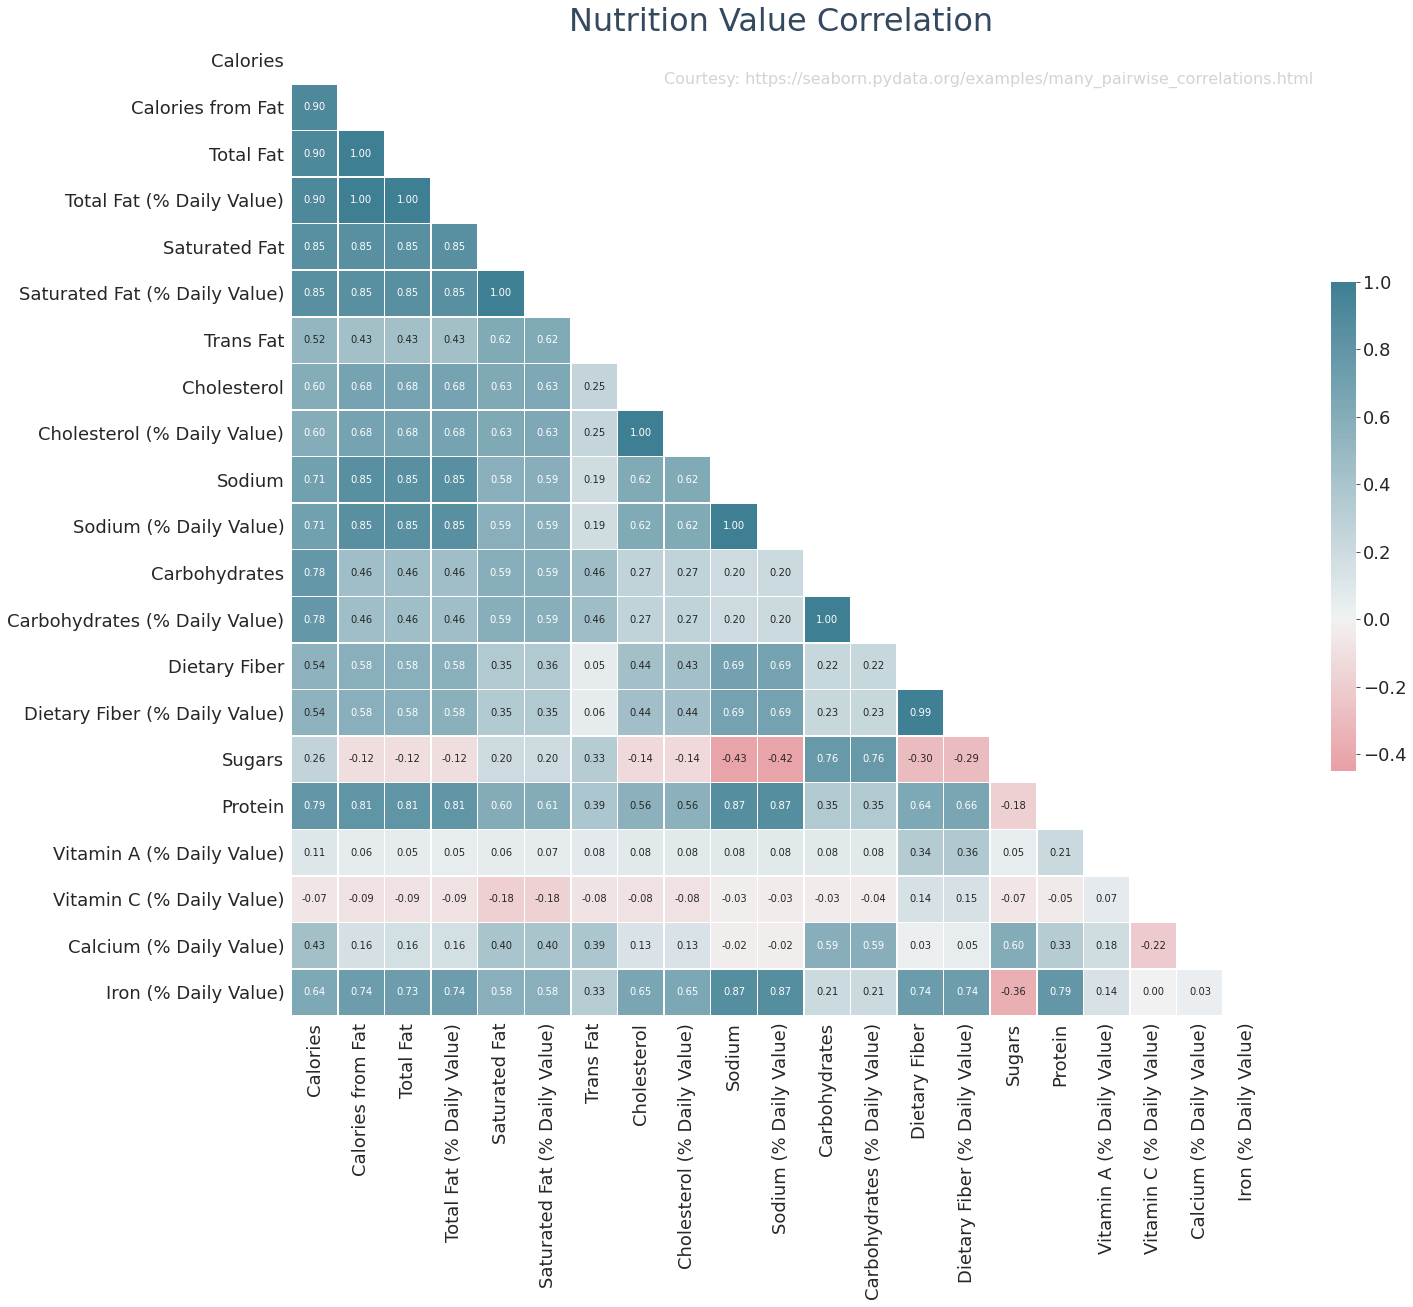

In [36]:
# Correlation Plot
from matplotlib import cm as cm

import matplotlib as mpl
%pylab inline
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

sns.set_style("whitegrid")
mask = np.zeros_like(df[df.columns[3:]].corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (22,18))

cmap = sns.diverging_palette(10,220, as_cmap = True)  #10,133

#Draw
sns.heatmap(df[df.columns[3:]].corr(), mask = mask, vmax = 1, vmin = -.45, center = 0,cmap=cmap,
           annot = True, square = True, linewidth = .5, cbar_kws = {'shrink':.5}, fmt= '.2f')
plt.text(8, 1, 'Courtesy: https://seaborn.pydata.org/examples/many_pairwise_correlations.html', fontsize=16,alpha=0.2)
plt.title("Nutrition Value Correlation", loc = 'center', size = 32, color = '#34495E')
#plt.savefig('Correlation Matrix'+'.png', bbox_inches = 'tight')

Calories was highly correlated positively to
1.   Calories from Fat
2.   Total Fat
3.   Saturated Fat
4.   Sodium
5.   Carbohydrates

Protien
Plot also highlights Sodium <–> Protien <—> Iron too are highly correlated positively Even Carbohydrates and Sugars show good bonding positively There is some week bonding of -4 between Sodium , Sugar and Iron

In [37]:
categories = np.array(df.Category.unique())
print(categories)
breakfastMeals = df[df.Category == 'Breakfast']
beef_porkMeals = df[df.Category == 'Beef & Pork']
chicken_fishMeals = df[df.Category == 'Chicken & Fish']
saladMeals = df[df.Category == 'Salads']
snacks_sidesMeals = df[df.Category == 'Snacks & Sides']
desserts = df[df.Category == 'Desserts']
beverages = df[df.Category == 'Beverages']
coffee_tea = df[df.Category == 'Coffee & Tea']
smoothies_shakes = df[df.Category == 'Smoothies & Shakes']

['Breakfast' 'Beef & Pork' 'Chicken & Fish' 'Salads' 'Snacks & Sides'
 'Desserts' 'Beverages' 'Coffee & Tea' 'Smoothies & Shakes']


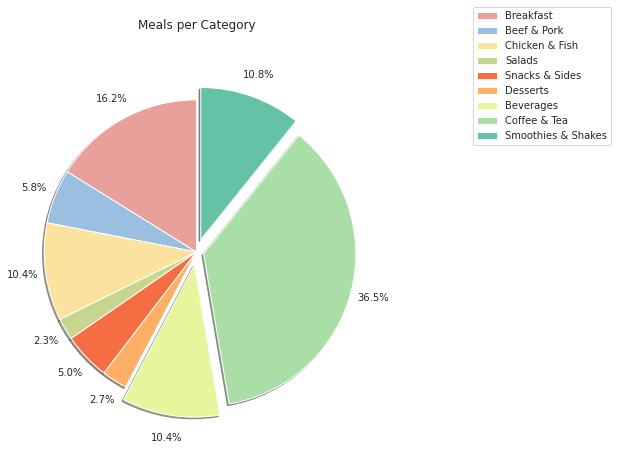

In [38]:
amtPerCategory = np.array([breakfastMeals.shape[0], 
                           beef_porkMeals.shape[0], 
                           chicken_fishMeals.shape[0],
                           saladMeals.shape[0],
                           snacks_sidesMeals.shape[0],
                           desserts.shape[0],
                           beverages.shape[0],
                           coffee_tea.shape[0],
                           smoothies_shakes.shape[0]
                          ])
colors = np.array(['#E8A09A', '#9BBFE0', '#FBE29F', '#C6D68F',
                  '#F66D44','#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6'])
plt.pie(amtPerCategory, labels=None, colors=colors,pctdistance=1.15,startangle=90,shadow=True,
       explode=(0,0,0,0,0,0,0.15,0.085,0.15), autopct='%1.1f%%',radius = 1.75)

#sclae the title up to match the pctdistance
plt.title("Meals per Category", y=1.5)
#add legend
plt.legend(labels=categories, bbox_to_anchor=(1.75,0.15,1.5,1.5), loc="upper left") 
plt.gca().set_aspect('equal')

Based on the pie chart above, 36.5% dataset are from Coffee & Tea menu category, and the least menu category are from Deserts. 

### Modeling

In [66]:
import io
from google.colab import files

import numpy as np
import pandas as pd
import tensorflow as tf

from keras import backend as K
from keras import callbacks
from keras import *
from keras.models import load_model
from keras.callbacks import History
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [67]:
df = pd.read_csv(io.BytesIO(uploaded['menu.csv']))
df.head(3)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10


In [68]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [69]:
# Deleting Coulumn 
del df['Category'], df['Serving Size'], df['Item']

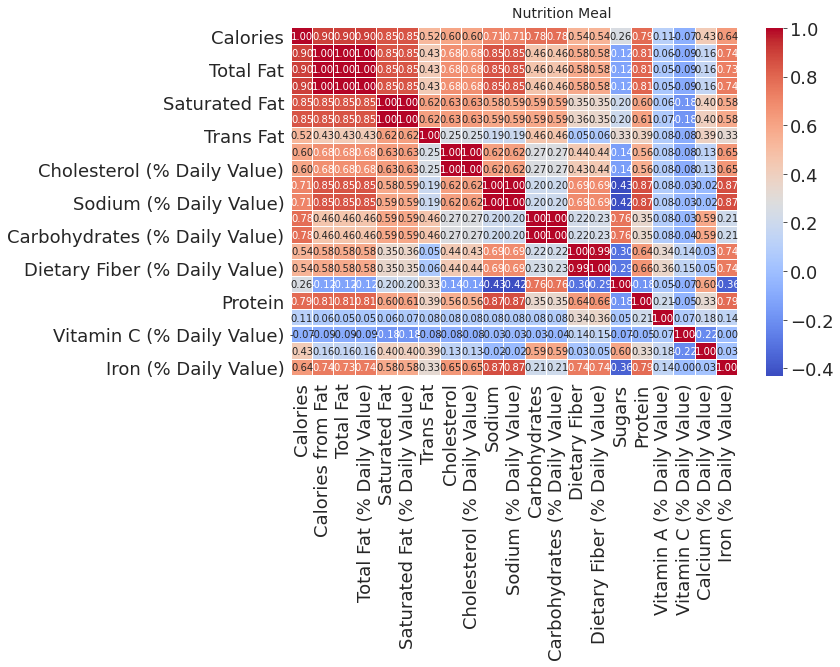

In [70]:
# Data Visualitation
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), 
                 annot=True, 
                 ax=ax, 
                 cmap="coolwarm",
                 fmt='.2f',
                 linewidths=.05)

f.subplots_adjust(top=0.93)
t= f.suptitle('Nutrition Meal', fontsize=14)

In [71]:
# Normalisasi
target = np.array(df['Calories']).reshape(-1,1)
#Y = StandardScaler().fit_transform(target)
X = StandardScaler().fit_transform(df[['Total Fat','Protein','Carbohydrates']])
n_inpt, inpt_size = X.shape

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, shuffle=False, random_state=0)                                  

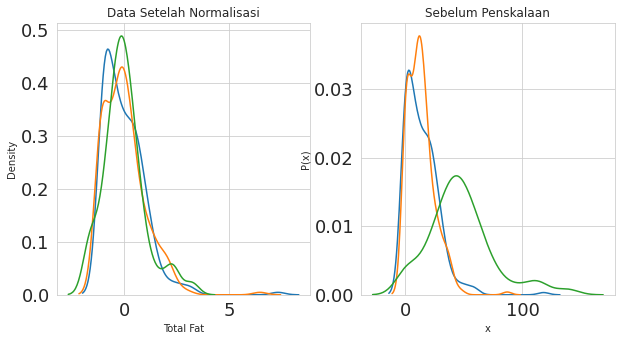

In [72]:
# Plot Hasil Normalisasi
fig, (ax, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
scaled_df = pd.DataFrame(X, columns=['Total Fat','Protein','Carbohydrates'])

ax.set_title('Data Setelah Normalisasi')
sns.kdeplot(scaled_df['Total Fat'], ax=ax)
sns.kdeplot(scaled_df['Protein'], ax=ax)
sns.kdeplot(scaled_df['Carbohydrates'], ax=ax)

ax1.set_title('Sebelum Penskalaan')
sns.kdeplot(df['Total Fat'], ax=ax1)
sns.kdeplot(df['Protein'], ax=ax1)
sns.kdeplot(df['Carbohydrates'], ax=ax1)

plt.ylabel('P(x)')
plt.xlabel('x')
plt.show()

In [73]:
# Statistic Summary Hasil Normalisasi
scaled_df.describe()

,Total Fat,Protein,Carbohydrates
count,2.600000e+02,2.600000e+02,2.600000e+02
mean,3.779028e-17,-1.782762e-16,3.138515e-17
std,1.001929e+00,1.001929e+00,1.001929e+00
min,-9.990642e-01,-1.169615e+00,-1.679070e+00
25%,-8.315589e-01,-8.188651e-01,-6.151588e-01
50%,-2.232500e-01,-1.173662e-01,-1.186670e-01
75%,5.701963e-01,4.964454e-01,4.487522e-01
max,7.323306e+00,6.459186e+00,3.321312e+00


#### Training

In [74]:
#Callback
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start) 

In [75]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(10,5))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [Kandungan Kalori]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()

  plt.figure(figsize=(10,5))  
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Kandungan Kalori]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.legend()

In [76]:
def build_model(frame_size): #membangun model dengan 64 neuron pada hidden layer menggunakan fungsi aktivasi relu
  model = keras.Sequential([
    layers.Dense(4, activation=tf.nn.relu, input_dim=frame_size),
    layers.Dense(1)
  ]) 
  
  #Menentukan optimizer yang akan digunakan
  optimizer = keras.optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)

  #Menentukan loss function dan menghitung error
  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [77]:
# Training Model
model = build_model(inpt_size)
EPOCHS = 500
time_callback = TimeHistory()

history = model.fit(
    X_train, y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot(),time_callback])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

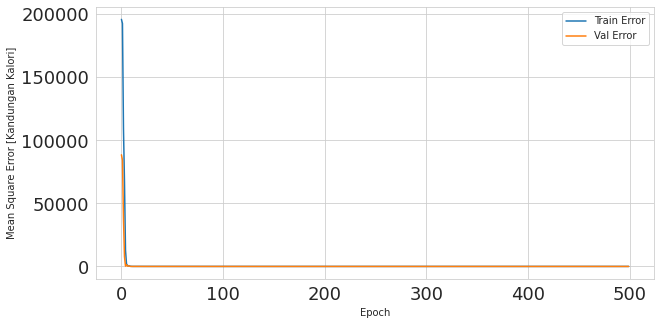

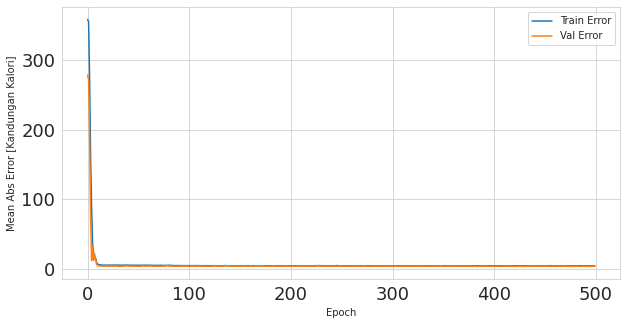

In [78]:
# Plot Training-Validation
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

plt.show()
plot_history(history)

#### Evaluating

In [79]:
# Test Model 
loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
y_predictions = model.predict(X_test)

# Metric
print('Evaluasi Prediksi Model: ')
print("Testing set Mean Abs Error: {:5.5f} Kalori".format(mae))
print("Testing set Mean Squared Error: {:5.5f} Kalori".format(mse))
print('\n')

# Hasil Prediksi
hasil = list([y_test, y_predictions])
df_hasil = pd.DataFrame()
df_hasil['Aktual'] = [i for i in hasil[0]]
df_hasil['Prediksi'] = hasil[1]
df_hasil.head(6)

Evaluasi Prediksi Model: 
Testing set Mean Abs Error: 5.75164 Kalori
Testing set Mean Squared Error: 51.73988 Kalori




,Aktual,Prediksi
0,[80],76.253311
1,[120],111.600746
2,[160],158.456146
3,[290],293.860382
4,[350],351.257202
5,[480],476.490051


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



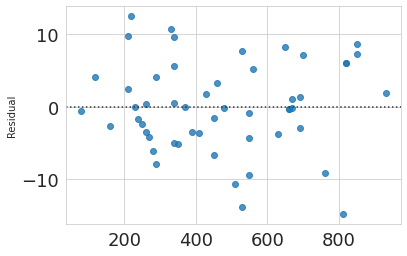

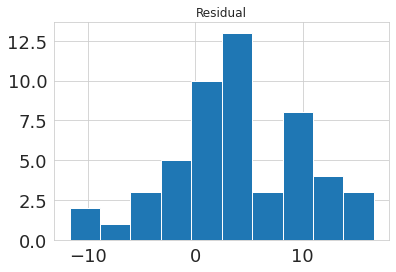

In [80]:
# Visualisasi Hasil
##Analisis Residual
residual = y_test - y_predictions.reshape(-1,1)
residual2 = pd.DataFrame(residual, columns=['Residual'])
##Residual Plot
sns.residplot(y_test, residual2['Residual'])
##Residual Histogram
residual2.hist()
pyplot.show()

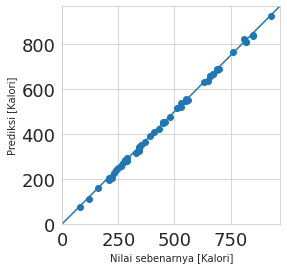

In [81]:
##Residual vs Actual Plot
plt.scatter(y_test, y_predictions)
plt.xlabel('Nilai sebenarnya [Kalori]')
plt.ylabel('Prediksi [Kalori]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.grid(True)
_ = plt.plot([-100, 1000], [-100, 1000])

### 1. How many calories does the average McDonald's value meal contain?

In [39]:
# mean from calories column
print(df['Calories'])
print('The average McDonalds value meal contain: %f calories' % (df.loc[:,"Calories"].mean()))

0      300
1      250
2      370
3      450
4      400
      ... 
255    510
256    690
257    340
258    810
259    410
Name: Calories, Length: 260, dtype: int64
The average McDonalds value meal contain: 368.269231 calories


In [40]:
## VERSI ke-2 ##
## ------------------------------------------------ ##
df_category = df.groupby('Category', axis=0)
print(df_category['Calories'].mean().sort_values(ascending=False).to_frame(), "\n")
print('The average McDonalds value meal contain: %f calories' % (df.loc[:,"Calories"].mean()))

                      Calories
Category                      
Chicken & Fish      552.962963
Smoothies & Shakes  531.428571
Breakfast           526.666667
Beef & Pork         494.000000
Coffee & Tea        283.894737
Salads              270.000000
Snacks & Sides      245.769231
Desserts            222.142857
Beverages           113.703704 

The average McDonalds value meal contain: 368.269231 calories


### 2. How much do beverages, like soda or coffee, contribute to the overall caloric intake? 

In [41]:
df.groupby(['Category'])['Calories'].sum()

Category
Beef & Pork            7410
Beverages              3070
Breakfast             22120
Chicken & Fish        14930
Coffee & Tea          26970
Desserts               1555
Salads                 1620
Smoothies & Shakes    14880
Snacks & Sides         3195
Name: Calories, dtype: int64

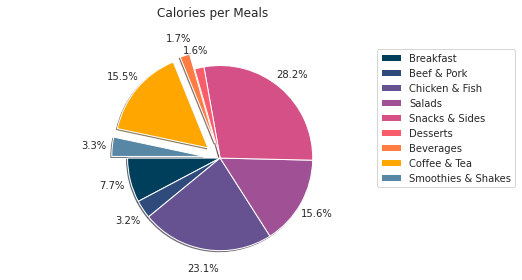

In [42]:
# setup data
labels = df['Category'].unique()
cal  = df.groupby(['Category'])['Calories'].sum()
sizes = [i*100./cal.sum() for i in cal]

# plot data
plt.pie(sizes, 
        autopct='%1.1f%%', 
        pctdistance=1.2, 
        explode=(0,0,0,0,0,0,0.30,0.30,0.30), 
        shadow=True, 
        startangle=180,
        radius=1.75,
        colors=(['#003f5c','#2f4b7c','#665191','#a05195','#d45087','#f95d6a','#ff7c43','#ffa600','#5886a5']))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# setup plot component
plt.title('Calories per Meals', y=1.1)
plt.tight_layout()
plt.legend(labels=labels, bbox_to_anchor=(0.75,0.5,0.5,0.5), loc="best") 

# plot show
plt.show()

Based on pie chart above Beverages, Coffee & Tea, and Smoothies & Shakes contribute 20.5% to overall calories intake.  

### 3.Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?

Before we do the analysis, we have to initialize what are the paramater needed ti get nutritional value. Threre are seven parameters to fulfill nutritional value; Calories, Fat, Saturates, Carbohydrates, Sugar, Protein, Salt

In [43]:
# membuat data frame dari semua item crispy dan grilled chicken sandwich
dfchickensandwich=df[(df["Item"]=="Premium Crispy Chicken Classic Sandwich")|(df["Item"]=="Premium Crispy Chicken Club Sandwich")|(df["Item"]=="Premium Crispy Chicken Ranch BLT Sandwich")|(df["Item"]=="Bacon Clubhouse Crispy Chicken Sandwich")|(df["Item"]=="Premium Grilled Chicken Classic Sandwich")|(df["Item"]=="Premium Grilled Chicken Club Sandwich")|(df["Item"]=="Premium Grilled Chicken Ranch BLT Sandwich")|(df["Item"]=="Bacon Clubhouse Grilled Chicken Sandwich")]
dfchickensandwich.reset_index(inplace=True)
dfchickensandwich

,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,0.0,45,16,990,41,55,18,3,13,10,24,4,6,15,20
1,58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,0.0,65,22,820,34,42,14,3,13,8,28,4,8,15,20
2,59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33.0,51,9.0,44,0.0,85,29,1410,59,58,19,3,14,11,36,8,20,30,20
3,60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,8.3 oz (235 g),510,180,20.0,31,7.0,36,0.0,105,35,1250,52,44,15,3,13,9,40,8,20,30,20
4,61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,8.1 oz (230 g),610,250,28.0,43,6.0,31,0.0,70,24,1400,58,57,19,3,13,11,32,4,20,15,20
5,62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,7.6 oz (217 g),450,130,15.0,23,4.5,22,0.0,90,30,1230,51,43,14,3,13,9,36,4,20,15,20
6,63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,10 oz (284 g),750,340,38.0,59,10.0,51,0.5,90,31,1720,72,65,22,4,15,16,36,8,25,30,15
7,64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,9.5 oz (270 g),590,230,25.0,39,8.0,42,0.0,110,37,1560,65,51,17,4,15,14,40,8,30,30,15


In [44]:
del dfchickensandwich['Category']

In [45]:
dfchickensandwich['Category']='Crispy','Grilled','Crispy','Grilled','Crispy','Grilled','Crispy','Grilled'

In [46]:
dfchickensandwich.head()

,index,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Category
0,57,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,0.0,45,16,990,41,55,18,3,13,10,24,4,6,15,20,Crispy
1,58,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,0.0,65,22,820,34,42,14,3,13,8,28,4,8,15,20,Grilled
2,59,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33.0,51,9.0,44,0.0,85,29,1410,59,58,19,3,14,11,36,8,20,30,20,Crispy
3,60,Premium Grilled Chicken Club Sandwich,8.3 oz (235 g),510,180,20.0,31,7.0,36,0.0,105,35,1250,52,44,15,3,13,9,40,8,20,30,20,Grilled
4,61,Premium Crispy Chicken Ranch BLT Sandwich,8.1 oz (230 g),610,250,28.0,43,6.0,31,0.0,70,24,1400,58,57,19,3,13,11,32,4,20,15,20,Crispy


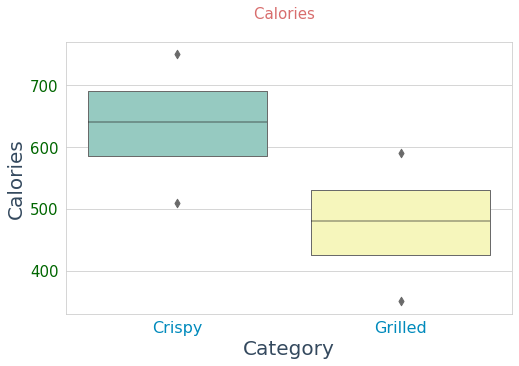

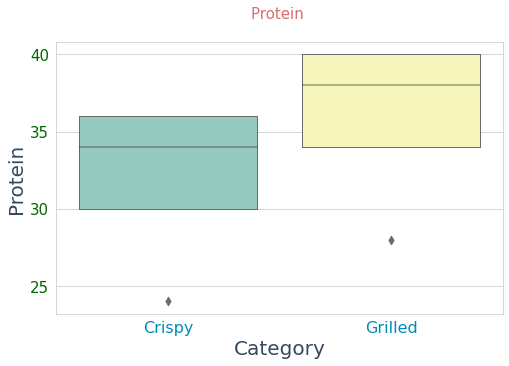

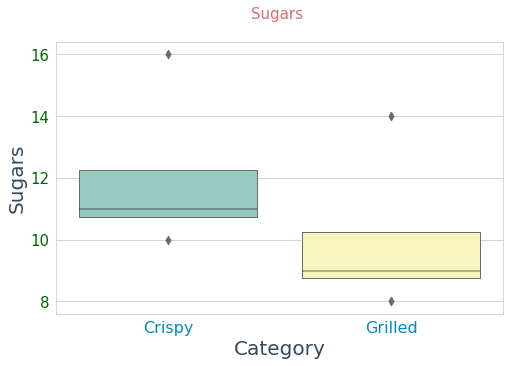

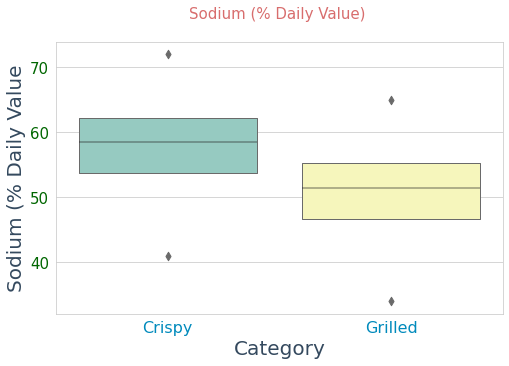

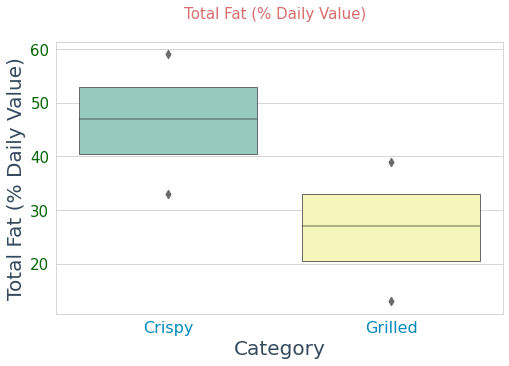

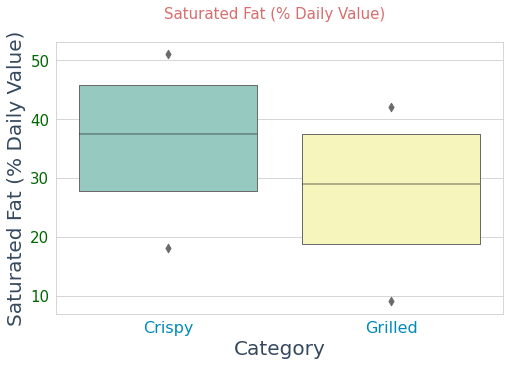

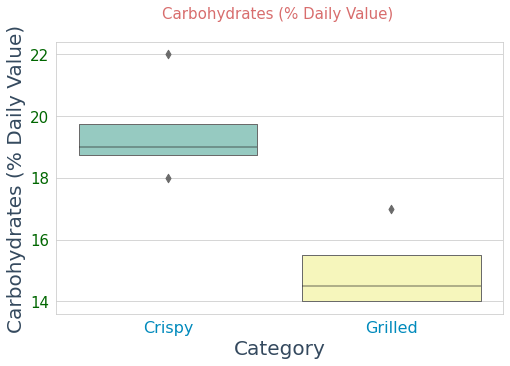

In [61]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calories', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Calories  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Calories',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Protein', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Protein \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Protein',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()


ax = sns.boxenplot(x="Category", y='Sugars', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Sugars \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Sugars',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Sodium (% Daily Value)', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Sodium (% Daily Value) \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Sodium (% Daily Value',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()


ax = sns.boxenplot(x="Category", y='Total Fat (% Daily Value)', data=dfchickensandwich, color='#eeeeee', palette="Set3")


# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Total Fat (% Daily Value)  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Total Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Saturated Fat (% Daily Value)', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Saturated Fat (% Daily Value)  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Saturated Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Carbohydrates (% Daily Value)', data=dfchickensandwich, color='#eeeeee', palette="Set3")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Carbohydrates (% Daily Value) \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Carbohydrates (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
plt.show()

Based on the boxplot above, six categories (Calories, Sugras, Sodium, Total Fat, Saturated Fat, and Cabohydrates) for Crispy Chicken are higher in value. Meanwhile from Protein for Grilled Chicken is higher than value. Yes, ordering Crispy Chicken Sandwich give higher nutritional value.

### 4. What about ordering egg whites instead of whole eggs? 

In [48]:
 #make data frame for menu with egg and whole eggs
df_eggmerge=df[(df["Item"]=="Bacon, Egg & Cheese Biscuit (Regular Biscuit)")|(df["Item"]=="Bacon, Egg & Cheese Biscuit (Large Biscuit)")|
          (df["Item"]=="Sausage Biscuit with Egg (Regular Biscuit)")|(df["Item"]=="Sausage Biscuit with Egg (Large Biscuit)")|
          (df["Item"]=="Bacon, Egg & Cheese McGriddles")|(df["Item"]=="Sausage, Egg & Cheese McGriddles")|
          (df["Item"]=="Bacon, Egg & Cheese Bagel")|(df["Item"]=="Big Breakfast (Regular Biscuit)")|(df["Item"]=="Big Breakfast (Large Biscuit)")|
          (df["Item"]=="Big Breakfast with Hotcakes (Regular Biscuit)")|(df["Item"]=="Big Breakfast with Hotcakes (Large Biscuit)")|
          (df["Item"]=="Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)")|(df["Item"]=="Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)")|
          (df["Item"]=="Sausage Biscuit with Egg Whites (Regular Biscuit)")|(df["Item"]=="Sausage Biscuit with Egg Whites (Large Biscuit)")|
          (df["Item"]=="Bacon, Egg & Cheese McGriddles with Egg Whites")|(df["Item"]=="Sausage, Egg & Cheese McGriddles with Egg Whites")|
          (df["Item"]=="Bacon, Egg & Cheese Bagel with Egg Whites")| (df["Item"]=="Big Breakfast with Egg Whites (Regular Biscuit)")|
          (df["Item"]=="Big Breakfast with Egg Whites (Large Biscuit)")|(df["Item"]=="Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)")|
          (df["Item"]=="Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)")]

df_eggmerge.reset_index(inplace=True)

In [49]:
df_eggmerge.head()

,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,250,83,1300,54,38,13,2,7,3,19,10,8,15,15
1,7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,250,83,1410,59,43,14,3,12,4,19,15,8,20,20
2,8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,35,11,1300,54,36,12,2,7,3,20,2,8,15,10
3,9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,35,11,1420,59,42,14,3,12,4,20,6,8,15,15
4,12,Breakfast,Sausage Biscuit with Egg (Regular Biscuit),5.7 oz (163 g),510,290,33.0,50,14.0,71,0.0,250,83,1170,49,36,12,2,6,2,18,6,0,10,20


In [50]:
del df_eggmerge['Category']

In [51]:
df_eggmerge['Category']='Egg','Egg','Egg','Egg','Egg','Egg','Egg','Egg','Egg','Egg','Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg','White Egg'

In [52]:
df_eggmerge.head()

,index,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Category
0,6,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,250,83,1300,54,38,13,2,7,3,19,10,8,15,15,Egg
1,7,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,250,83,1410,59,43,14,3,12,4,19,15,8,20,20,Egg
2,8,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,35,11,1300,54,36,12,2,7,3,20,2,8,15,10,Egg
3,9,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,35,11,1420,59,42,14,3,12,4,20,6,8,15,15,Egg
4,12,Sausage Biscuit with Egg (Regular Biscuit),5.7 oz (163 g),510,290,33.0,50,14.0,71,0.0,250,83,1170,49,36,12,2,6,2,18,6,0,10,20,Egg


In [53]:
df_eggmerge.tail()

,index,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Category
17,30,Big Breakfast with Egg Whites (Large Biscuit),10.1 oz (286 g),690,370,41.0,63,14.0,72,0.0,35,12,1700,71,55,18,4,17,4,26,4,2,10,15,White Egg
18,31,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,510,56.0,87,19.0,96,0.0,575,192,2150,90,111,37,6,23,17,36,15,2,25,40,White Egg
19,32,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60.0,93,20.0,100,0.0,575,192,2260,94,116,39,7,28,17,36,15,2,30,40,White Egg
20,33,Big Breakfast with Hotcakes and Egg Whites (Re...,14.9 oz (423 g),990,410,46.0,70,16.0,78,0.0,55,19,2170,91,110,37,6,23,17,35,0,2,25,30,White Egg
21,34,Big Breakfast with Hotcakes and Egg Whites (La...,15.4 oz (437 g),1050,450,50.0,77,16.0,81,0.0,55,19,2290,95,115,38,7,28,18,35,4,2,25,30,White Egg


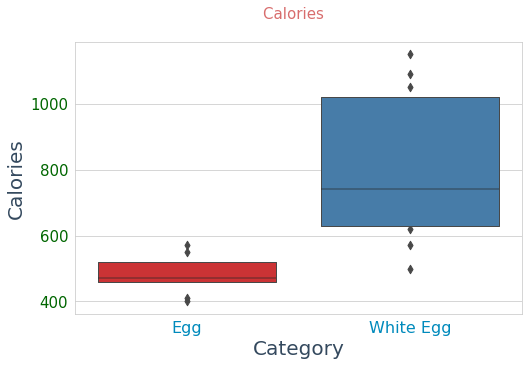

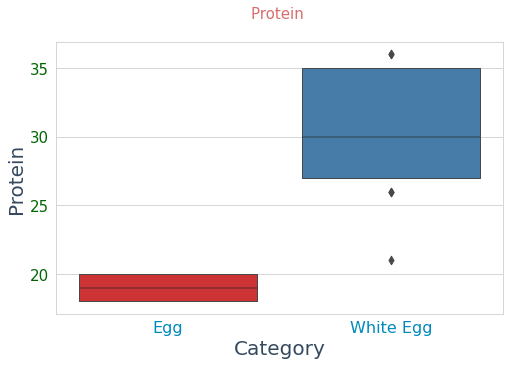

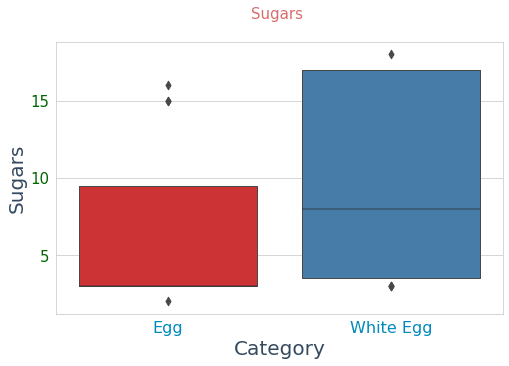

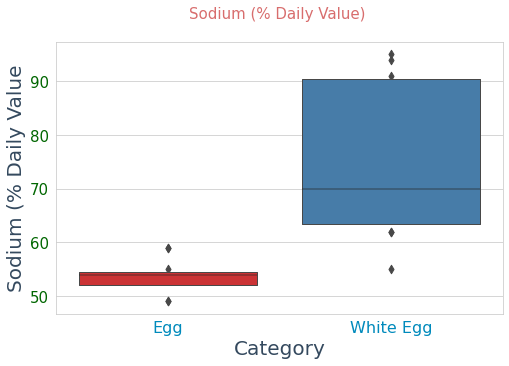

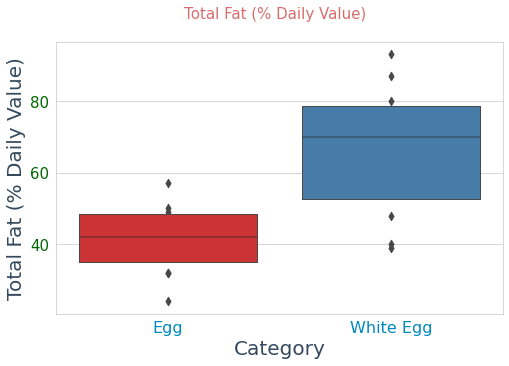

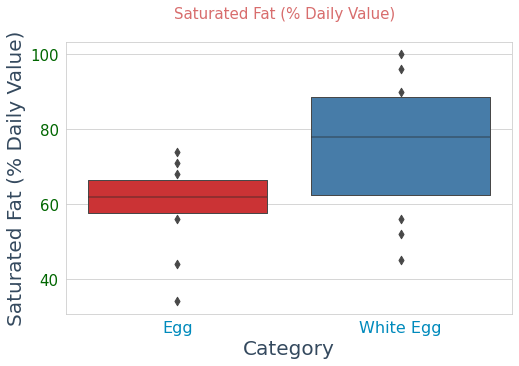

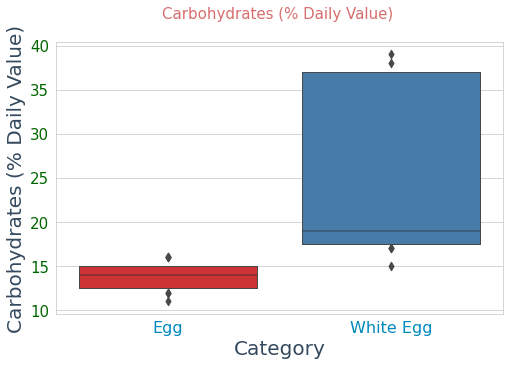

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calories', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Calories  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Calories',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Protein', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Protein \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Protein',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()


ax = sns.boxenplot(x="Category", y='Sugars', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Sugars \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Sugars',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Sodium (% Daily Value)', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Sodium (% Daily Value) \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Sodium (% Daily Value',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()


ax = sns.boxenplot(x="Category", y='Total Fat (% Daily Value)', data=df_eggmerge, color='#eeeeee', palette="Set1")


# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Total Fat (% Daily Value)  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Total Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Saturated Fat (% Daily Value)', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Saturated Fat (% Daily Value)  \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Saturated Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Carbohydrates (% Daily Value)', data=df_eggmerge, color='#eeeeee', palette="Set1")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))
    
plt.title("Carbohydrates (% Daily Value) \n", loc="center",size=15,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20) 
plt.ylabel('Carbohydrates (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation='horizontal', wrap=True)  
plt.yticks(size=15,color='#006600')
plt.show()

Based on the boxplot above, from all of the nutritional value's parameter white egg give higher nutritional value in number than normal egg. 

### 5. What is the least number of items could you order from the menu to meet one day's nutritional requirements?

In [55]:
MenuItems = df.Item.tolist()
Calories = df.set_index('Item')['Calories'].to_dict()
TotalFat = df.set_index('Item')['Total Fat'].to_dict()
SaturatedFat = df.set_index('Item')['Saturated Fat'].to_dict()
Carbohydrates = df.set_index('Item')['Carbohydrates'].to_dict()
Sugars = df.set_index('Item')['Sugars'].to_dict()
Protein = df.set_index('Item')['Protein'].to_dict()
Sodium = df.set_index('Item')['Sodium'].to_dict()

# Energy: 8,400kJ/2,000kcal
# Total fat: less than 70g
# Saturates: less than 20g
# Carbohydrate: at least 260g
# Total sugars: 90g
# Protein: 50g
# Salt: less than 6g

prob = LpProblem("McOptimization Problem", LpMinimize)
MenuItems_vars = LpVariable.dicts("MenuItems",MenuItems,lowBound=0, upBound=10,cat='Integer')
prob += lpSum([Calories[i]*MenuItems_vars[i] for i in MenuItems]), "Calories"
prob += lpSum([TotalFat[i]*MenuItems_vars[i] for i in MenuItems]) <= 70, "TotalFat"
prob += lpSum([SaturatedFat[i]*MenuItems_vars[i] for i in MenuItems]) <= 20, "Saturated Fat"
prob += lpSum([Carbohydrates[i]*MenuItems_vars[i] for i in MenuItems]) >= 260, "Carbohydrates_lower"
# prob += lpSum([Carbohydrates[i]*MenuItems_vars[i] for i in MenuItems]) <= 360, "Carbohydrates_upper"
prob += lpSum([Sugars[i]*MenuItems_vars[i] for i in MenuItems]) >= 80, "Sugars_lower"
prob += lpSum([Sugars[i]*MenuItems_vars[i] for i in MenuItems]) <= 100, "Sugars_upper"

prob += lpSum([Protein[i]*MenuItems_vars[i] for i in MenuItems]) >= 45, "Protein_lower"
prob += lpSum([Protein[i]*MenuItems_vars[i] for i in MenuItems]) <= 55, "Protein_upper"

prob += lpSum([Sodium[i]*MenuItems_vars[i] for i in MenuItems]) <= 6000, "Sodium"


prob.writeLP("McOptimization.lp")
prob.solve()
data_matrix = []
data_matrix.append(['Item', 'Amount','Calories','Total Fat','Carbohydrates','Protein','Sodium'])

print("Status:", LpStatus[prob.status])
for v in prob.variables():
    if v.varValue > 0:
        Item = df.loc[df['Item'] == v.name.replace('MenuItems_','').replace('_',' ')]
        Item_Calories = Item['Calories'].values*v.varValue
        Item_TotalFat = Item['Total Fat'].values*v.varValue
        Item_Carbohydrates = Item['Carbohydrates'].values*v.varValue
        Item_Protein = Item['Protein'].values*v.varValue
        Item_Sodium = Item['Sodium'].values*v.varValue


        data_matrix.append([v.name.replace('MenuItems_','').replace('_',' '),v.varValue,Item_Calories[0], \
                           Item_TotalFat[0],Item_Carbohydrates[0],Item_Protein[0],Item_Sodium[0]])


print(' ')
results = {}
print("Total Calories = ", value(prob.objective))
for constraint in prob.constraints:
    s = 0
    for var, coefficient in prob.constraints[constraint].items():
        sum = var.varValue * coefficient
    results[prob.constraints[constraint].name.replace('_lower','').replace('_upper','')] = s  

#Ini untuk nampilin apa ya???
## bisa pake ini untuk variable y nya
'''
y = []
for i in data_matrix[1:]:
  count = 0
  z = []
  for j in i[1:]:
    z.append(j/1000.0)
    count += 1
  if count == 6 :
    y.append(z)
  else:
    pass 
'''

'''
table = ff.create_table(data_matrix)
iplot(table, filename='simple_table')
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Nutrition',
    x=["TotalFat","Saturated Fat","Carbohydrates","Sugars","Protein","Sodium"], \
    y=[["TotalFat"],["Saturated_Fat"],["Carbohydrates"],["Sugars"],["Protein"],["Sodium"]/1000],
    error_y=dict(
            type='data',
            symmetric=False,
            array=[70-["TotalFat"], 20-["Saturated_Fat"], 0, 100-["Sugars"],55-["Protein"],2-["Sodium"]/1000],
            arrayminus=[["TotalFat"]-0,["Saturated_Fat"]-0,["Carbohydrates"]-260,["Sugars"]-80,["Protein"]-45,["Sodium"]/1000-0])
))

fig.layout.update(barmode='group')
iplot(fig, filename='r')
'''

result = pd.DataFrame(data_matrix[1:], columns=data_matrix[0]) 
result

Status: Optimal
 
Total Calories =  1370.0


/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1195: UserWarning:

Spaces are not permitted in the name. Converted to '_'



,Item,Amount,Calories,Total Fat,Carbohydrates,Protein,Sodium
0,Apple Slices,2.0,30.0,0.0,8.0,0.0,0.0
1,Diet Dr Pepper (Large),7.0,0.0,0.0,0.0,28.0,980.0
2,Fruit & Maple Oatmeal without Brown Sugar,5.0,1300.0,20.0,245.0,25.0,575.0
3,Side Salad,2.0,40.0,0.0,8.0,2.0,20.0


The least number of items could order from the menu to meet one day's nutritional requirements is 


1.   2 Apple Slices
2.   7 Diet Dr Pepper (Large)
3.   5 Fruit & Maple Oatmeal without Brown Sugar
4.   2 Side Salad



